In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [87]:
data = pd.read_csv('navnestatistikk-for-theo.csv')

#set index til category
data.set_index('Category', inplace=True)

#drop alle verdier sim er 0.0
data = data[data['Theo'] != 0.0]

#kolonnen theo er i prosent, så vi deler på 100
data['Theo'] = data['Theo'] / 100

#drop alle verdier hvor Cateogry er lavere enn 1990
data = data[data.index >= 1990]

#gi nytt navn til index
data.index.names = ['År']

In [88]:
barn = pd.read_csv('barn.csv')

#set indexen til å være år
barn = barn.set_index('År')


In [89]:
#slå sammen data og barn
data = pd.concat([data, barn], axis=1)

# lag en ny kolonne som er Theo ganget med antall barn for å få absolutt antall
data['Antall_Theo'] = data['Theo'] * data['Barn']

#endre "Antall_Theo" til å kun være heltall rundet opp til nærmeste heltall
data['Antall_Theo'] = data['Antall_Theo'].apply(np.ceil)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


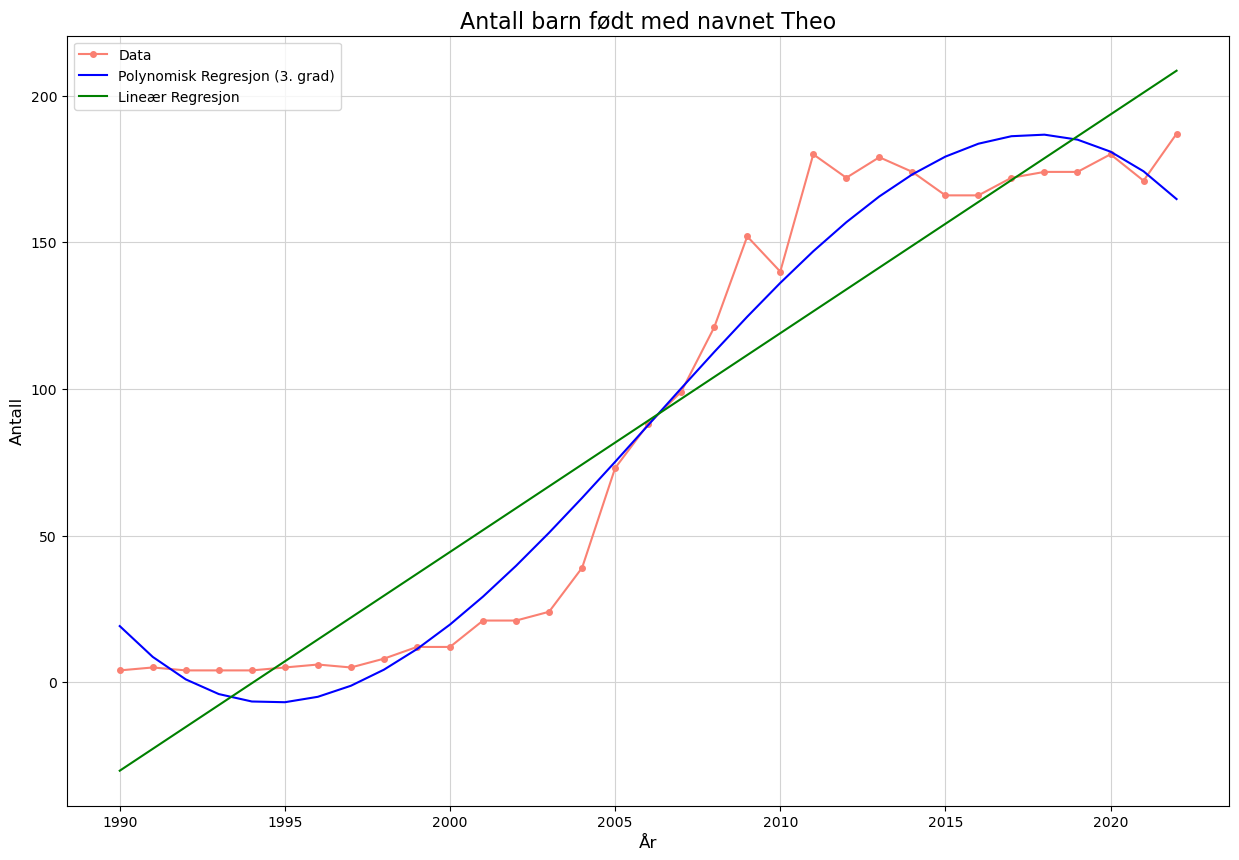

In [90]:
#være sikker på at vi referer til riktig data
x = data.index.values
y = data['Antall_Theo']

# Utfør polynomisk regresjon
degree = 3  # Hvor mange graders polynom skal vi bruke?
coefficients = np.polyfit(x, y, degree)
poly_regression = np.poly1d(coefficients)

# Utfør lineær regresjon med statsmodels
x_linear = sm.add_constant(x)
model_linear = sm.OLS(y, x_linear)
results_linear = model_linear.fit()

# Hent resultatene fra lineær regresjon
linear_intercept, linear_slope = results_linear.params

# Plot tidsserien
plt.figure(figsize=(15, 10))
plt.plot(x, y, marker='o', linestyle='-', markersize=4, color='salmon', linewidth=1.5, label='Data')

# Plot polynomisk regresjonslinje
plt.plot(x, poly_regression(x), linestyle='-', color='blue', linewidth=1.5, label='Polynomisk Regresjon (3. grad)')

# Plot lineær regresjonslinje
plt.plot(x, results_linear.fittedvalues, linestyle='-', color='green', linewidth=1.5, label='Lineær Regresjon')

# Legg til rutenett
plt.grid(color='lightgray')

# Sett tittel og aksetitler
plt.title('Antall barn født med navnet Theo', fontsize=16)
plt.xlabel('År', fontsize=12)
plt.ylabel('Antall', fontsize=12)

# Juster skriftstørrelsen på aksetickene
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legg til en forklaring
plt.legend()

# Vis plottet
plt.show()



In [91]:
# Utfør lineær regresjon med statsmodels
x_linear = sm.add_constant(x)
model_linear = sm.OLS(y, x_linear)
results_linear = model_linear.fit()

# Hent koeffisientene fra lineær regresjon
linear_intercept, linear_slope = results_linear.params

# Utfør polynomisk regresjon
degree = 3  # Velg graden på polynomet
coefficients = np.polyfit(x, y, degree)
poly_regression = np.poly1d(coefficients)

# Definer fremtidige år
future_years = np.array([2025, 2030, 2035, 2040, 2045, 2050]).astype(float)

# Opprett en DataFrame for å lagre prognoser
predictions_table = pd.DataFrame({'År': future_years})

# Prognose ved hjelp av lineær regresjon
linear_predictions = linear_intercept + linear_slope * future_years
predictions_table['Lineær Regresjon'] = linear_predictions

# prognose ved hjelp av polynomisk regresjon
poly_predictions = poly_regression(future_years)
predictions_table['Polynomisk Regresjon'] = poly_predictions

# Vis prognosene
print(predictions_table)

       År  Lineær Regresjon  Polynomisk Regresjon
0  2025.0        230.889483            117.738646
1  2030.0        268.188948            -33.742242
2  2035.0        305.488414           -297.000518
3  2040.0        342.787879           -695.497789
4  2045.0        380.087344          -1252.695663
5  2050.0        417.386809          -1992.055750Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



## Prognoser for Antall barn født med navnet Theo

Dette er en oppsummering av prognosene for antall barn født med navnet Theo basert på lineær og polynomisk regresjon.

### Lineær Regresjon

For lineær regresjon er følgende prognoser beregnet:

- **2025**: 230.89 barn
- **2030**: 268.19 barn
- **2035**: 305.49 barn
- **2040**: 342.79 barn
- **2045**: 380.09 barn
- **2050**: 417.39 barn

### Polynomisk Regresjon

For polynomisk regresjon (3. grad) er følgende prognoser beregnet:

- **2025**: 117.74 barn
- **2030**: -33.74 barn
- **2035**: -297.00 barn
- **2040**: -695.50 barn
- **2045**: -1252.70 barn
- **2050**: -1992.06 barn

Vi må være forsiktige når vi tolker disse prognosene. Selv om modellene kan gi estimater for antall barn født med navnet Theo, er det viktig å merke seg at det selvfølgelig ikke kan fødes et negativt antall barn. Videre må vi være oppmerksomme på at den polynomiske regresjonsmodellen kan gi negative verdier i noen tilfeller, spesielt for langtidsprognoser.

Det er også viktig å være klar over begrensningene ved å bruke disse modellene basert på begrenset tilgjengelig data. Overfitting er et fenomen der en modell tilpasser seg for godt til treningssdataene og deretter gir upålitelige prognoser for nye data. For å få pålitelige prognoser er det derfor nødvendig å vurdere nøye hvilken modell som er mest hensiktsmessig å bruke i den aktuelle konteksten.



# ⚠️ EKSPERIMENTERING ⚠️

Denne delen inneholder eksperimentell kode og kan være under utvikling. Vær oppmerksom på at resultatene eller funksjonaliteten muligens ikke er optimal eller fullstendig pålitelig.



In [92]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = data.index.values.reshape(-1, 1)  # Year
y = data['Antall_Theo']  # Totalt_Theo

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict for future years
future_years = np.array([2025, 2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)
future_predictions = rf.predict(future_years)

# Print or use the predictions
print(future_predictions)


[182.27 182.27 182.27 182.27 182.27 182.27]
